In [14]:
import numpy as np
import matplotlib.pyplot as plt
from datareader import get_data
import gzip
from ellipsoid_fit_python.ellipsoid_fit import ellipsoid_fit, ellipsoid_plot
from IPython.display import display
from scipy.signal import decimate
%matplotlib widget

In [2]:
with gzip.open("dumps/calib2.dump.gz", "rb") as f:
    contents = f.read()
    uncalHeading = get_data(contents, ["uncalibratedHeading"])
    uncalAccel = get_data(contents, ["uncalibratedAcceleration"])

In [4]:
def get_point_cloud(dump_data):
    pts = np.zeros((0,3))    
    for key, vals in dump_data.items():
        idx = int(key[len(key) - 1])
        pts.resize((len(vals), 3))
        vals = np.array(vals)
        pts[:, idx] = vals[:, 1]
    return pts
    
accelPts = get_point_cloud(uncalAccel)
headingPts = get_point_cloud(uncalHeading)

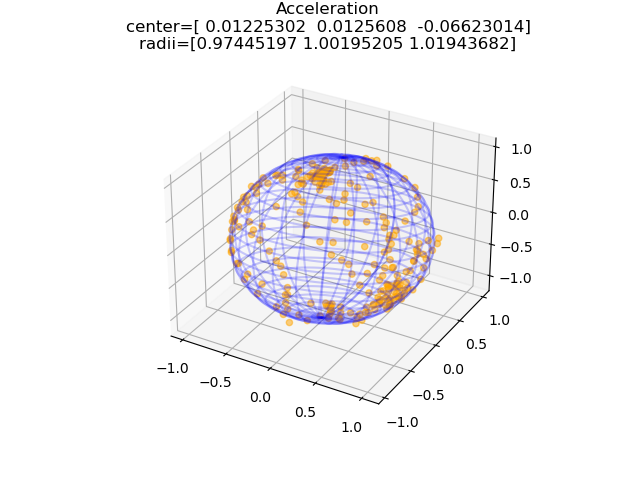

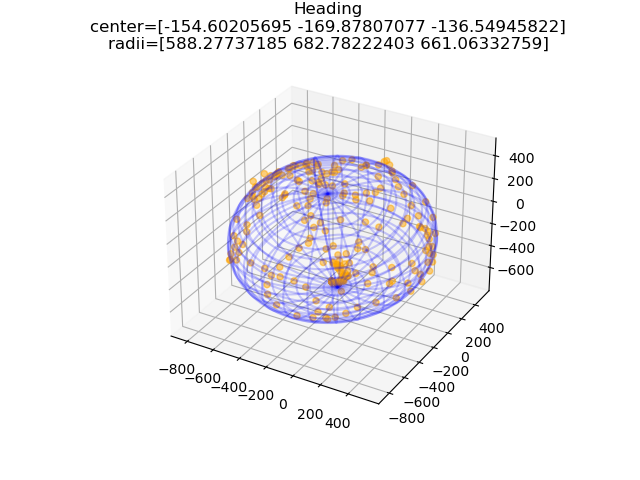

In [23]:
def plot_point_cloud(pts, title=None):
    center, evecs, radii, v = ellipsoid_fit(pts)
    
    pts = decimate(pts, 30, axis=0)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.clear()
    ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], alpha=0.5, color="orange")
    ellipsoid_plot(center, radii, evecs, ax=ax)
    plt.title(f"{title}\ncenter={center}\nradii={radii}")
    
plot_point_cloud(accelPts, "Acceleration")
plot_point_cloud(headingPts, "Heading")